In [1]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
from config import api_key

In [2]:
#Generate random latitude and longitude values. 
#latitude range is 90 and -90
#longitude rant is 180 to -180
lat_range = {'min': -90, 'max': 90}
long_range = {'min': -180, 'max': 180}

#Create lists for latitude and longitude
latitude_value = np.arange(lat_range['min'], lat_range['max'], 0.02)
longitude_value =np.arange(long_range['min'], long_range['max'], 0.02)

In [3]:
print(latitude_value)

[-90.   -89.98 -89.96 ...  89.94  89.96  89.98]


In [4]:
print(longitude_value)

[-180.   -179.98 -179.96 ...  179.94  179.96  179.98]


In [5]:
#Create empty dataframe and add data add data to dataframe using open weather and citipy
columns = ('city_name', 'country_code', 'random_latitude', 'random_longitude', 'latitude', 'longitude','Temperature','Humidity','Cloudiness','Wind_speed')
cities_df = pd.DataFrame(columns = columns)
cities_df

,city_name,country_code,random_latitude,random_longitude,latitude,longitude,Temperature,Humidity,Cloudiness,Wind_speed


In [6]:
#Sample json response from openweathermap API

#{"coord":{"lon":139,"lat":35},
#"sys":{"country":"JP","sunrise":1369769524,"sunset":1369821049},
#"weather":[{"id":804,"main":"clouds","description":"overcast clouds","icon":"04n"}],
#"main":{"temp":289.5,"humidity":89,"pressure":1013,"temp_min":287.04,"temp_max":292.04},
#"wind":{"speed":7.31,"deg":187.002},
#"rain":{"3h":0},
#"clouds":{"all":92},
#"dt":1369824698,
#"id":1851632,
#"name":"Shuzenji",
#"cod":200}


#Set sample size
num_of_cities = 500
#Assign API target URL
target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'metric'

counter = 0

#GEt Temperature, humidity, cloudiness and Wind Speed ata for cities and populated cities_df

while len(cities_df) <= num_of_cities:
    random_latitude =random.choice(latitude_value) #Genrate random latitude value
    random_longitude = random.choice(longitude_value) #generate random longitude value
    city = citipy.nearest_city(random_latitude, random_longitude) #Citipy method to get nearest city info
    city_name = city.city_name
    country_code = city.country_code
    url = target_url + city_name + ',' + country_code +'&units=' + units + '&APPID=' + api_key
    response = requests.get(url)
    response_json = response.json()
    if response_json["cod"] == 200:   #Internal paramater for every successful json response
        latitude = response_json["coord"]["lat"]
        longitude = response_json["coord"]["lon"]
        Temperature = response_json["main"]["temp"]
        Humidity = response_json["main"]["humidity"]
        Cloudiness = response_json["clouds"]["all"]
        Wind_speed = response_json["wind"]["speed"]
        if city_name not in cities_df.city_name.values: #Add check to avoid duplicate city names
             #Append values
            cities_df.set_value(counter, "city_name", city_name)
            cities_df.set_value(counter, "country_code", country_code)
            cities_df.set_value(counter, "random_latitude", random_latitude)
            cities_df.set_value(counter, "random_longitude", random_longitude)
            cities_df.set_value(counter, "latitude", latitude)
            cities_df.set_value(counter, "longitude", longitude)
            cities_df.set_value(counter, "Temperature", Temperature)
            cities_df.set_value(counter, "Humidity", Humidity)
            cities_df.set_value(counter, "Cloudiness", Cloudiness)
            cities_df.set_value(counter, "Wind_speed", Wind_speed)
            
            counter += 1
            time.sleep(1.5) #sleep 1.5 secs. Max 60 calls per minute allowed with free version
        else:
            pass
    else:
        pass

cities_df.head()

C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\robin\Anaconda3\lib\s

,city_name,country_code,random_latitude,random_longitude,latitude,longitude,Temperature,Humidity,Cloudiness,Wind_speed
0,albany,au,-77.22,99.4,-35.02,117.88,19.04,67,80,6.17
1,castro,cl,-55.38,-102.66,-42.48,-73.76,8.49,88,88,2.02
2,kangaatsiaq,gl,67.86,-52.98,68.31,-53.46,-6.01,96,56,1.57
3,atyrau,kz,47.64,50.5,47.1,51.92,14,71,40,6
4,necochea,ar,-49.54,-54.52,-38.55,-58.74,17.04,93,92,6.47


In [7]:
cities_df.tail()

,city_name,country_code,random_latitude,random_longitude,latitude,longitude,Temperature,Humidity,Cloudiness,Wind_speed
496,tessalit,ml,22.48,2.08,20.2,1.01,18.64,30,0,2.87
497,bulungu,cd,-4.58,18.68,-4.54,18.6,22.04,95,88,1.97
498,westport,nz,-38.96,166.26,-41.75,171.6,10.89,100,32,1.07
499,esmeraldas,ec,1.28,-79.74,-1.87,-79.8,25,78,75,2.6
500,borzya,ru,50.4,116.62,50.39,116.53,15.49,33,0,7.47


In [8]:
#Export dataframe to csv file
cities_df.to_csv("weatherdata_cities.csv", encoding="utf-8", index = False)

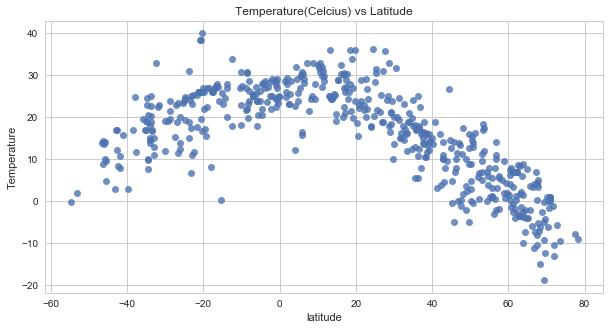

In [9]:
sns.set_style('ticks')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.regplot(x="latitude", y="Temperature", data=cities_df, fit_reg=False).set_title('Temperature(Celcius) vs Latitude')

# Save the figure
plt.savefig("Temp_vs_latitude.png")

# Show plot
plt.show()

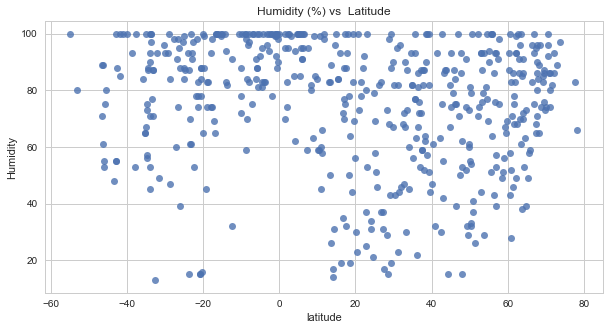

In [10]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.regplot(x="latitude", y="Humidity", data=cities_df, fit_reg=False).set_title('Humidity (%) vs  Latitude')

# Save the figure
plt.savefig("latitude_vs_humidity.png")

# Show plot
plt.show()

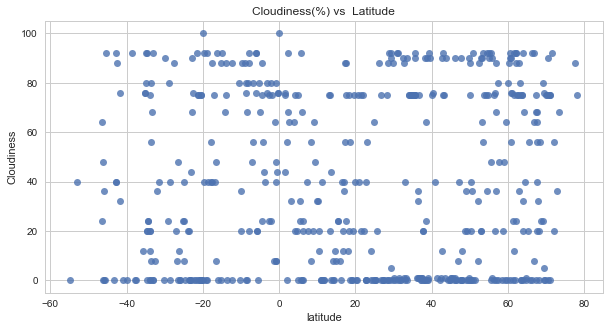

In [11]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.regplot(x="latitude", y="Cloudiness", data=cities_df, fit_reg=False).set_title('Cloudiness(%) vs  Latitude')

# Save the figure
plt.savefig("latitude_vs_cloudiness.png")

# Show plot
plt.show()

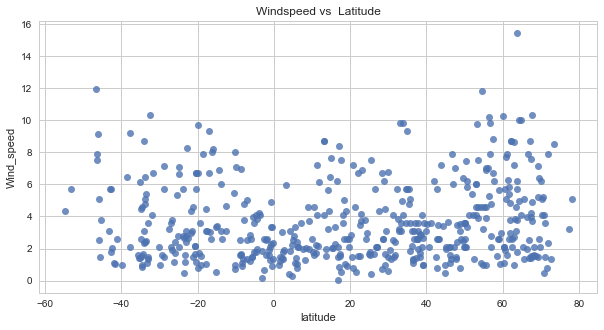

In [12]:
# Build a scatter plot City Latitude vs. WindSpeed
sns.set_style('ticks')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.regplot(x="latitude", y="Wind_speed", data=cities_df, fit_reg=False).set_title('Windspeed vs  Latitude')

# Save the figure
plt.savefig("latitude_vs_windspeed.png")

# Show plot
plt.show()